In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import os
import joblib
from dataprep.eda import *

In [5]:
df = pd.read_csv("C:/Users/Mua/Downloads/Breast Cancer.csv")
df 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 569 entries, 0 to 568

Data columns (total 32 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   id                       569 non-null    int64  

 1   diagnosis                569 non-null    object 

 2   radius_mean              569 non-null    float64

 3   texture_mean             569 non-null    float64

 4   perimeter_mean           569 non-null    float64

 5   area_mean                569 non-null    float64

 6   smoothness_mean          569 non-null    float64

 7   compactness_mean         569 non-null    float64

 8   concavity_mean           569 non-null    float64

 9   concave_points_mean      569 non-null    float64

 10  symmetry_mean            569 non-null    float64

 11  fractal_dimension_mean   569 non-null    float64

 12  radius_se                569 non-null    float64

 13  texture_se               569 non-null    float64

 14  perimet

In [33]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

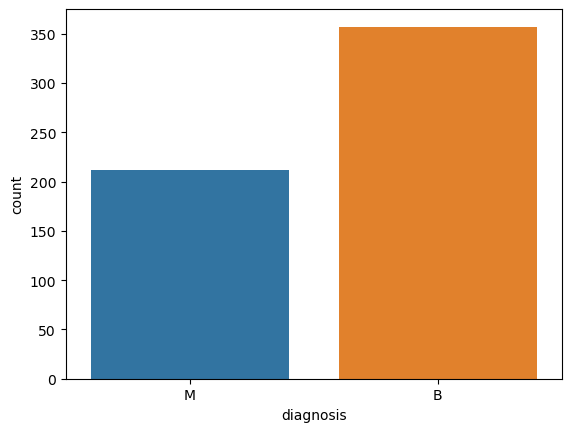

In [31]:
sns.countplot(x='diagnosis', data=df)

In [32]:
A = df['diagnosis'].value_counts()
A

B    357
M    212
Name: diagnosis, dtype: int64

In [38]:
df.dropna(how="any",inplace=False)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
diagnosis = {index : label for index, label in enumerate(encoder.classes_)}
diagnosis

{0: 'B', 1: 'M'}

In [7]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [8]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

print('x \n' , X[:10])
print('y \n' , y[:10])

x 

 [[9.14760426e-04 5.21037437e-01 2.26580994e-02 5.45988529e-01

  3.63732768e-01 5.93752821e-01 7.92037298e-01 7.03139644e-01

  7.31113320e-01 6.86363636e-01 6.05518113e-01 3.56147022e-01

  1.20469413e-01 3.69033596e-01 2.73811258e-01 1.59295645e-01

  3.51398444e-01 1.35681818e-01 3.00625118e-01 3.11645185e-01

  1.83042439e-01 6.20775525e-01 1.41524520e-01 6.68310175e-01

  4.50697994e-01 6.01135838e-01 6.19291556e-01 5.68610224e-01

  9.12027491e-01 5.98462448e-01 4.18863964e-01]

 [9.14996350e-04 6.43144493e-01 2.72573554e-01 6.15783291e-01

  5.01590668e-01 2.89879931e-01 1.81767990e-01 2.03608247e-01

  3.48757455e-01 3.79797980e-01 1.41322662e-01 1.56436719e-01

  8.25892857e-02 1.24440466e-01 1.25659790e-01 1.19386749e-01

  8.13230390e-02 4.69696970e-02 2.53835954e-01 8.45387516e-02

  9.11100977e-02 6.06901459e-01 3.03571429e-01 5.39817720e-01

  4.35214314e-01 3.47553325e-01 1.54563359e-01 1.92971246e-01

  6.39175258e-01 2.33589592e-01 2.22878132e-01]

 [9.24954884e-0

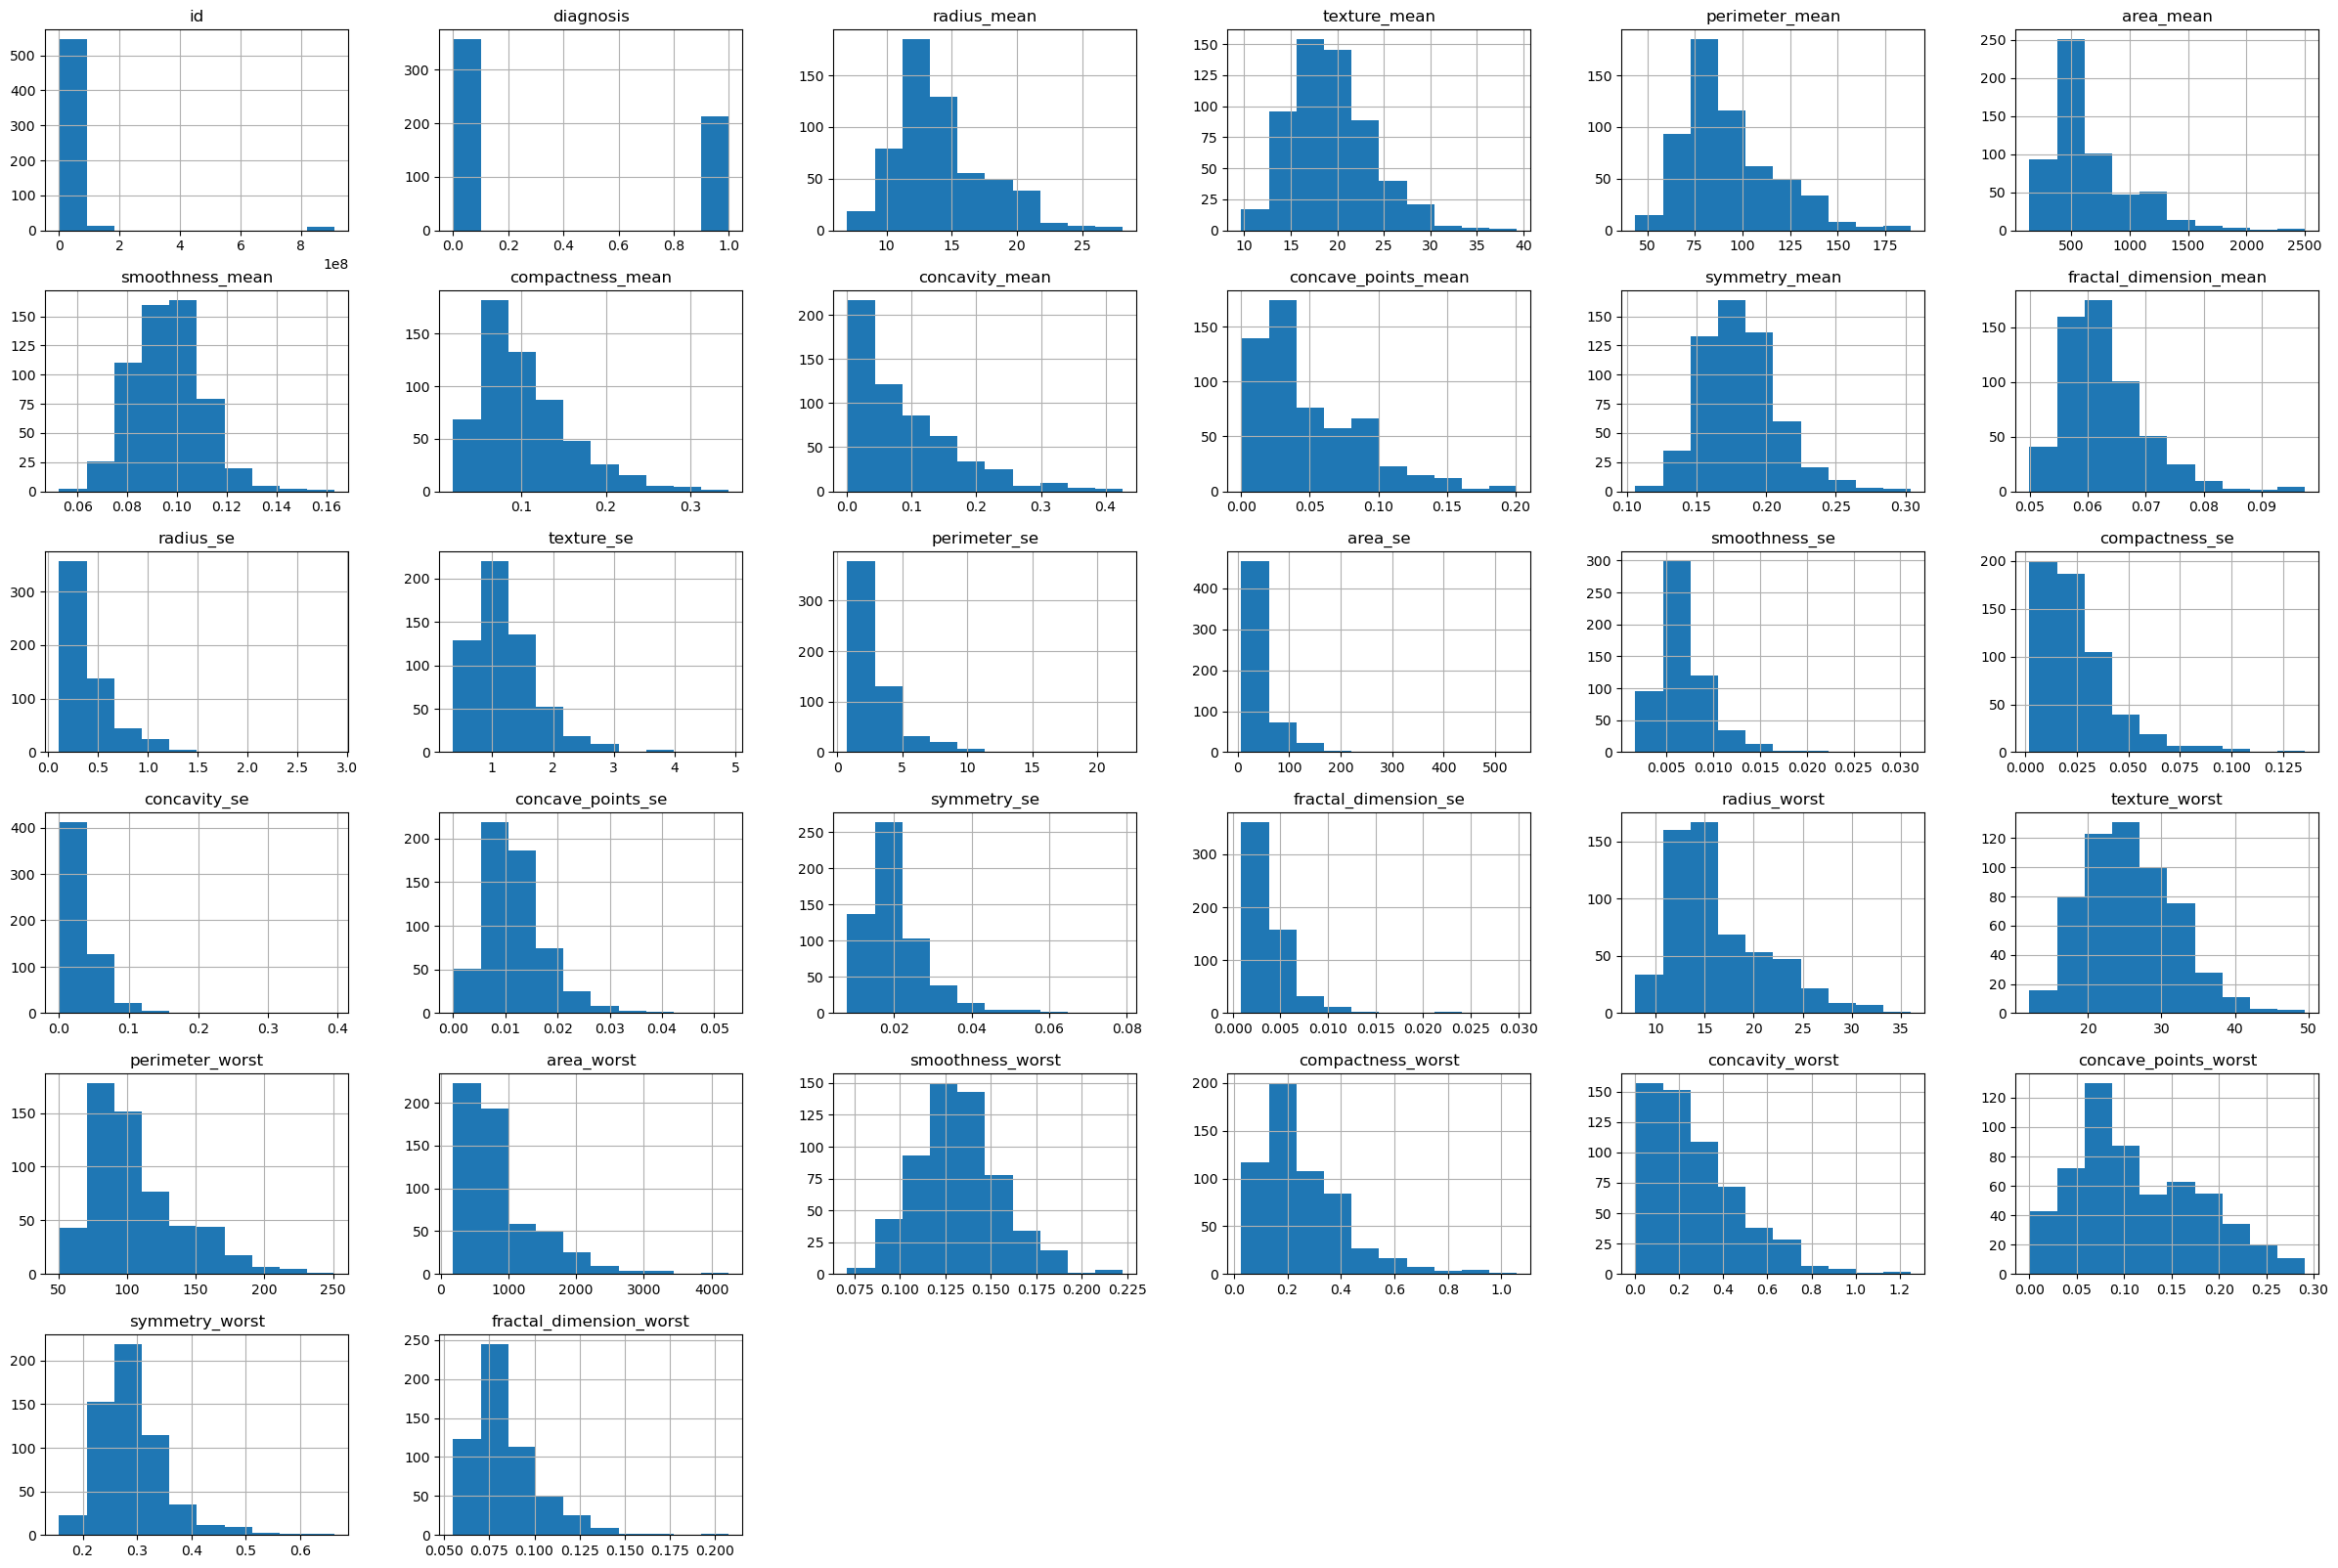

In [43]:
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

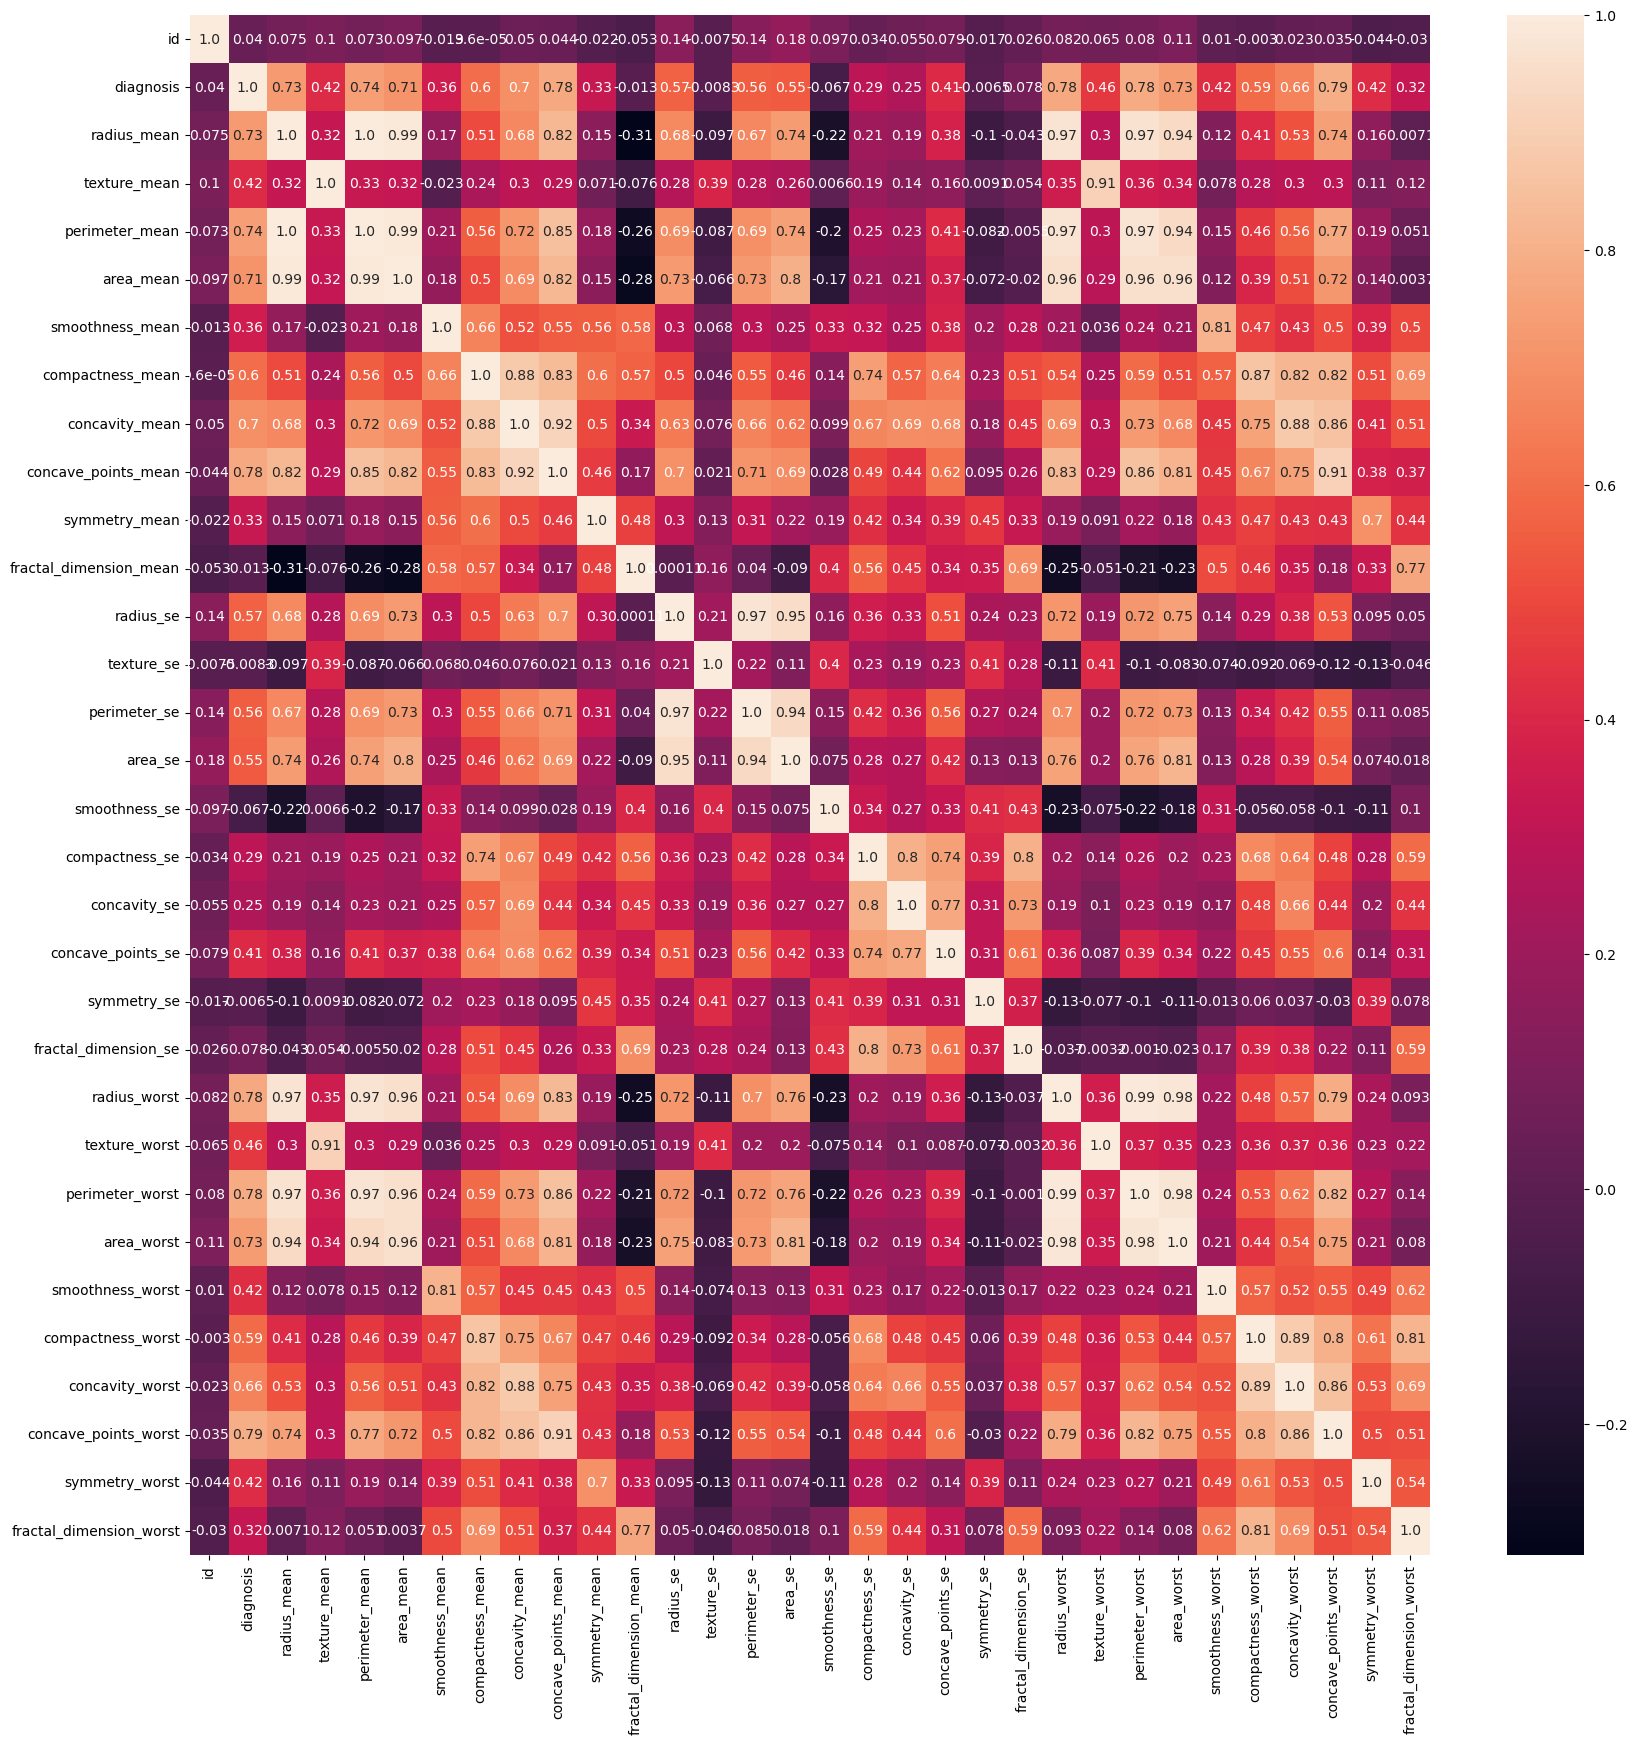

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2")

In [10]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print("X_train shape is:",X_train.shape)
print("X_test shape is:",X_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

X_train shape is: (398, 31)

X_test shape is: (171, 31)

y_train shape is: (398,)

y_test shape is: (171,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

In [50]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:


Accuracy Score: 100.00%

_______________________________________________

CLASSIFICATION REPORT:

               0      1  accuracy  macro avg  weighted avg

precision    1.0    1.0       1.0        1.0           1.0

recall       1.0    1.0       1.0        1.0           1.0

f1-score     1.0    1.0       1.0        1.0           1.0

support    249.0  149.0       1.0      398.0         398.0

_______________________________________________

Confusion Matrix: 

 [[249   0]

 [  0 149]]



Test Result:


Accuracy Score: 91.81%

_______________________________________________

CLASSIFICATION REPORT:

                    0          1  accuracy   macro avg  weighted avg

precision    0.951923   0.865672  0.918129    0.908797      0.920146

recall       0.916667   0.920635  0.918129    0.918651      0.918129

f1-score     0.933962   0.892308  0.918129    0.913135      0.918616

support    108.000000  63.000000  0.918129  171.000000    171.000000

___________________________

In [13]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.9949748743718593

DecisionTreeClassifierModel Test Score is :  0.9532163742690059

DecisionTreeClassifierModel Classes are :  ['B' 'M']

DecisionTreeClassifierModel feature importances are :  [0.         0.         0.02338251 0.         0.         0.

 0.00730703 0.         0.7211744  0.         0.         0.01385726

 0.         0.         0.         0.         0.         0.

 0.         0.         0.         0.04039584 0.09686119 0.

 0.06876491 0.01071998 0.         0.         0.         0.

 0.01753688]

----------------------------------------------------

Predicted Value for DecisionTreeClassifierModel is :  ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']

Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.99115044 0.00884956]

 [0.         1.        ]

 [0.         1.        ]

 [0.99115044 0.00884956]

 [0.99115044 0.00884956]

 [0.         1.        ]

 [0.         1.        ]

 [0.         1.        ]

 [1.      

In [54]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  163


In [58]:
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.9532163742690059


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.96      0.96      0.96       108

           1       0.94      0.94      0.94        63



    accuracy                           0.95       171

   macro avg       0.95      0.95      0.95       171

weighted avg       0.95      0.95      0.95       171




In [67]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits

Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})

Train Result:


Accuracy Score: 98.24%

_______________________________________________

CLASSIFICATION REPORT:

                    0           1  accuracy   macro avg  weighted avg

precision    0.995902    0.961039  0.982412    0.978470      0.982850

recall       0.975904    0.993289  0.982412    0.984596      0.982412

f1-score     0.985801    0.976898  0.982412    0.981349      0.982468

support    249.000000  149.000000  0.982412  398.000000    398.000000

_______________________________________________

Confusion Matrix: 

 [[243   6]

 [  1 148]]



Test Result:


Accuracy Score: 94.15%

_______________________________________________

CLASSIFICATION REPORT:

                    0          1  accuracy   macro avg  weighted avg

precision    0.971154   0.895522   0.94152    0.933338    

In [68]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:


Accuracy Score: 100.00%

_______________________________________________

CLASSIFICATION REPORT:

               0      1  accuracy  macro avg  weighted avg

precision    1.0    1.0       1.0        1.0           1.0

recall       1.0    1.0       1.0        1.0           1.0

f1-score     1.0    1.0       1.0        1.0           1.0

support    249.0  149.0       1.0      398.0         398.0

_______________________________________________

Confusion Matrix: 

 [[249   0]

 [  0 149]]



Test Result:


Accuracy Score: 96.49%

_______________________________________________

CLASSIFICATION REPORT:

                    0          1  accuracy   macro avg  weighted avg

precision    0.963636   0.967213  0.964912    0.965425      0.964954

recall       0.981481   0.936508  0.964912    0.958995      0.964912

f1-score     0.972477   0.951613  0.964912    0.962045      0.964790

support    108.000000  63.000000  0.964912  171.000000    171.000000

___________________________

In [70]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best paramters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False})

Train Result:


Accuracy Score: 100.00%

_______________________________________________

CLASSIFICATION REPORT:

               0      1  accuracy  macro avg  weighted avg

precision    1.0    1.0       1.0        1.0           1.0

recall       1.0    1.0       1.0        1.0           1.0

f1-score     1.0    1.0       1.0        1.0           1.0

support    249.0  149.0       1.0      398.0         398.0

_______________________________________________

Confusion Matrix: 

 [[249   0]

 [  0 149]]



Test Result:


Accuracy Score: 96.49%

_______________________________________________

CLASSIFICATION REPORT:

                    0          1  accuracy   macro avg  weighted avg

precision    0.963636   0.967213  0.964912    0.965425      0.964954

recall       0.981481   0

In [71]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Train Result:


Accuracy Score: 100.00%

_______________________________________________

CLASSIFICATION REPORT:

               0      1  accuracy  macro avg  weighted avg

precision    1.0    1.0       1.0        1.0           1.0

recall       1.0    1.0       1.0        1.0           1.0

f1-score     1.0    1.0       1.0        1.0           1.0

support    249.0  149.0       1.0      398.0         398.0

_______________________________________________

Confusion Matrix: 

 [[249   0]

 [  0 149]]



Test Result:


Accuracy Score: 96.49%

_______________________________________________

CLASSIFICATION REPORT:

                    0          1  accuracy   macro avg  weighted avg

precision    0.963636   0.967213  0.964912    0.965425      0.964954

recall       0.981481 

In [16]:
tr = DecisionTreeClassifier(random_state= 42)
tr.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

93.56725146198829

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)*100

63.1578947368421

In [10]:
ac = neighbors.KNeighborsClassifier(n_neighbors=10)
ac.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [11]:
y_pred = ac.predict(X_test)
accuracy_score(y_pred, y_test)*100

D:\Programs\A\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


71.34502923976608

In [13]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [14]:
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)*100

95.90643274853801

91.6030534351145

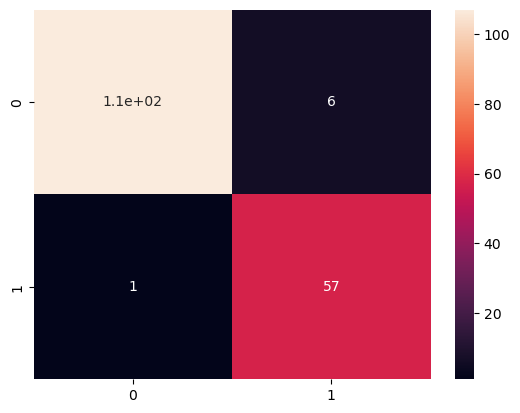

In [18]:
sns.heatmap(confusion_matrix(rf.predict(X_test), y_test),annot=True)
f1_score(tr.predict(X_test), y_test)*100

In [33]:
input_data =np.asarray((17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890)).reshape(1,-1)

if(prediction == 'B') :
  print ("Peediction is B")
else : 
  print('prediction is M')

prediction is M


C:\Users\Mua\AppData\Local\Temp\ipykernel_4444\3784889463.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

  if(prediction == 'B') :
